In [2]:
from typing import Iterable

# Map value within half-open range [from_min, from_max) to half-open range [to_min, to_max)
def map_range(val, from_min, from_max, to_min, to_max):
    from_diff = from_max - from_min
    to_diff = to_max - to_min
    val_rel = val - from_min
    return (val_rel / from_diff) * to_diff + to_min

def find_closest(target, values: Iterable):
    closest = values[0]
    diff_closest = abs(closest - target)

    for val in values[1:]:
        diff_val = abs(val - target)
        if diff_closest > diff_val:
            closest = val
            diff_closest = diff_val

    return closest

In [3]:
# Test cases for map_range
assert map_range(5, 0, 10, 0, 50) == 25
assert map_range(5, 0, 10, 10, 20) == 15
assert map_range(25, 0, 50, 0, 10) == 5

In [5]:
DAC_BITS = 8

# How much voltage a DAC step adds in volts
v_step = 5 / 2 ** DAC_BITS

amplitudes = list(map(lambda b: v_step * 2 ** b, range(1, DAC_BITS + 1)))
dmg_amplitude = find_closest(2, amplitudes)
cgb_amplitude = find_closest(0.3, amplitudes)

print('Vstep = {}V'.format(round(v_step, 4)))

print('DMG')
print('    - Amplitude: {}'.format(dmg_amplitude))
# print('    - Bit depth: {}'.format())

print('CGB')
print('    - Amplitude: {}'.format(cgb_amplitude))
# print('    - Bit depth: {}'.format())
    

Vstep = 0.0195V
DMG
    - Amplitude: 2.5
CGB
    - Amplitude: 0.3125


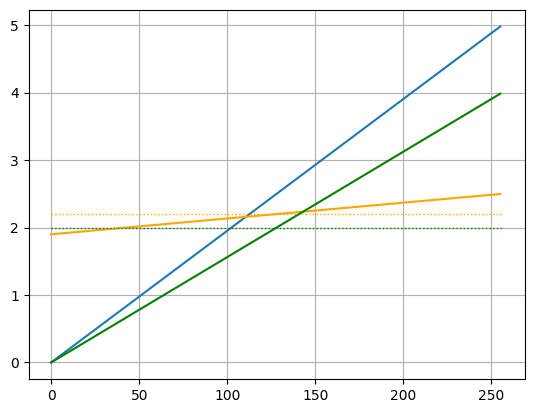

In [36]:
import matplotlib.pyplot as plt
import numpy as np

TOP_X = 2 ** DAC_BITS

x = np.array(range(0, TOP_X))
voltages = x * v_step
voltages_dmg = np.vectorize(lambda v: map_range(v, 0, 5, 0, 4))(voltages)
voltages_cgb = np.vectorize(lambda v: map_range(v, 0, 5, 1.9, 2.5))(voltages)

plt.plot(x, voltages)
plt.plot(x, voltages_cgb, color='orange')
plt.plot((0, TOP_X), (2.2, 2.2), color='orange', linewidth='1', linestyle='dotted')
plt.plot(x, voltages_dmg, color='green')
plt.plot((0, TOP_X), (2, 2), color='green', linewidth='1', linestyle='dotted')
plt.grid(True, axis='both')
plt.show()

In [14]:
def divide_by_16(v):
    if v < 128:
        if v < 64:
            if v < 32:
                if v < 16:
                    return 0
                else:
                    return 1
            else:
                if v < (32 + 16):
                    return 2
                else:
                    return 3
        else:
            if v < (64 + 32):
                if v < (64 + 16):
                    return 4
                else:
                    return 5
            else:
                if v < (64 + 32 + 16):
                    return 6
                else:
                    return 7
    else:
        if v < (128 + 64):
            if v < (128 + 32):
                if v < (128 + 16):
                    return 8
                else:
                    return 9
            else:
                if v < (128 + 32 + 16):
                    return 10
                else:
                    return 11
        else:
            if v < (128 + 64 + 32):
                if v < (128 + 64 + 16):
                    return 12
                else:
                    return 13
            else:
                if v < (128 + 64 + 32 + 16):
                    return 14
                else:
                    return 15

for i in range(256):
    assert i // 16 == divide_by_16(i)

14 14
